In [1]:
import numpy as np
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt

from sklearn.feature_selection import f_classif, mutual_info_classif, SelectFdr

from sklearn.feature_selection import GenericUnivariateSelect
from sklearn.svm import LinearSVC, NuSVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier 

from scipy.stats import uniform, randint

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split

from warnings import filterwarnings
filterwarnings('ignore')


In [2]:

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    axes : array of 3 axes, optional (default=None)
        Axes to use for plotting the curves.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : int, cross-validation generator or an iterable, optional
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, optional (default=None)
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like, shape (n_ticks,), dtype float or int
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the dtype is float, it is regarded as a
        fraction of the maximum size of the training set (that is determined
        by the selected validation method), i.e. it has to be within (0, 1].
        Otherwise it is interpreted as absolute sizes of the training sets.
        Note that for classification the number of samples usually have to
        be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title)
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt

In [3]:
class hyper_model:
    
    def __init__(self,model_name,X_train,y_train,X_test,y_test):
        
        self.model_name = model_name
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.best_model = None
        self.best_params = None
        self.best_model_perf = None
        self.all_models_perf = pd.DataFrame(None,columns=['Model Iteration','Score'])
        self.stock_model = None
        self.rd_model = None
        self.grid_model = None


    def fit(self):
        
 
        
        # Linear SVM



        if self.model_name == 'linear_svm':

            # Initial Model Fit with stock hyper_params    

            model = LinearSVC(random_state=0, tol=1e-5)

            model.fit(self.X_train,self.y_train)

            init_score = model.score(self.X_test,self.y_test)

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Stock Params',
                                        'Score':init_score}, ignore_index=True)

            print('Initial Model with Stock Params Score : {}'.format(init_score))

            # Random Search Cross Validation

            params = {'C': [0.1, 1, 10, 100, 1000]}  



            search_linear_svm = RandomizedSearchCV(model,
                                                   param_distributions=params,
                                                   random_state=42, 
                                                   n_iter=300, 
                                                   cv=4, 
                                                   verbose=1, 
                                                   n_jobs=1, 
                                                   return_train_score=True)

            search_linear_svm.fit(self.X_train,self.y_train)

            best_rd_linear_svm = search_linear_svm.best_estimator_

            best_rd_linear_svm_score = best_rd_linear_svm.score(X_test, y_test)

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Random HP Search Best Model',
                                'Score':best_rd_linear_svm_score }, ignore_index=True)

            rd_score_improv = ((best_rd_linear_svm_score - init_score)/init_score) * 100

            print('Random HP Search Best Model Score : {}'.format(best_rd_linear_svm_score))

            print('Improvement of {}% relative to the initial model'.format(rd_score_improv))

            # Further Grid Search Cross Validation

            params = {'C': np.linspace(search_linear_svm.best_params_['C']-5,
                                       search_linear_svm.best_params_['C']+5,
                                       10)}  

            grid_search_linear_svm = GridSearchCV(model,
                                             param_grid=params, 
                                             cv=4, 
                                             verbose=1, 
                                             n_jobs=1)

            grid_search_linear_svm.fit(self.X_train,self.y_train)

            grid_best_rd_linear_svm = grid_search_linear_svm.best_estimator_

            grid_best_rd_linear_svm_score = grid_best_rd_linear_svm.score(X_test, y_test)

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Further Grid HP Search Best Model',
                                'Score':grid_best_rd_linear_svm_score}, ignore_index=True)

            grid_score_improv = ((grid_best_rd_linear_svm_score - init_score)/init_score) * 100

            print('Further Grid HP Search Best Model Score : {}'.format(grid_best_rd_linear_svm_score))

            print('Improvement of {}% relative to the initial model'.format(grid_score_improv))


            mask_best = self.all_models_perf['Score'] == self.all_models_perf['Score'].max()

            overall_best = str(self.all_models_perf['Model Iteration'][self.all_models_perf['Score'][mask_best].index])

            print('Overall Best Model : {}'.format(overall_best))

            if overall_best == 'Stock Params':

                self.best_model = model
                self.best_params = model.get_params()

            elif overall_best == 'Random HP Search Best Model':

                self.best_model = best_rd_linear_svm
                self.best_params = best_rd_linear_svm.get_params()

            elif overall_best == 'Further Grid HP Search Best Model':

                self.best_model = grid_best_rd_linear_svm
                self.best_params = grid_best_rd_linear_svm.get_params()


            self.stock_model = model
            self.rd_model = best_rd_linear_svm
            self.grid_model = grid_best_rd_linear_svm



        # Non Linear SVM


        elif self.model_name == 'non_linear_svm':

            # Initial Model Fit with stock hyper_params

            model = NuSVC(gamma='auto',random_state=True,kernel='poly')

            

            init_score = np.mean(cross_val_score(model,X,y,cv=8))

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Stock Params',
                                        'Score':init_score}, ignore_index=True)

            print('Initial Model with Stock Params Score : {}'.format(init_score))

            # Random Search Cross Validation


            params = {'nu': [0.01, 0.3, 0.5, 0.7, 1],  
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
                          'kernel': ['rbf','poly','sigmoid']
                         }  

            search_non_linear_svm = RandomizedSearchCV(model,
                                                   param_distributions=params,
                                                   random_state=42, 
                                                   n_iter=300, 
                                                   cv=8, 
                                                   verbose=1, 
                                                   n_jobs=1, 
                                                   return_train_score=True)

            search_non_linear_svm.fit(X,y)

            best_rd_non_linear_svm = search_non_linear_svm.best_estimator_

            best_rd_non_linear_svm_score = np.mean(cross_val_score(best_rd_non_linear_svm,X,y,cv=8))

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Random HP Search Best Model',
                                'Score':best_rd_non_linear_svm_score}, ignore_index=True)

            rd_score_improv = ((best_rd_non_linear_svm_score - init_score)/init_score) * 100

            print('Random HP Search Best Model Score : {}'.format(best_rd_non_linear_svm_score))

            print('Improvement of {}% relative to the initial model'.format(rd_score_improv))
            
            

            # Further Grid Search Cross Validation

            params = {'nu': np.linspace(search_non_linear_svm.best_params_['nu']-0.1,
                                       search_non_linear_svm.best_params_['nu']+0.1,
                                       10),  
                      'gamma': np.linspace(search_non_linear_svm.best_params_['gamma']-0.1,
                                       search_non_linear_svm.best_params_['gamma']+0.1,
                                       10), 
                      'kernel': [search_non_linear_svm.best_params_['kernel']]
                     }  

            grid_search_non_linear_svm = GridSearchCV(model,
                                             param_grid=params, 
                                             cv=8, 
                                             verbose=1, 
                                             n_jobs=1)

            grid_search_non_linear_svm.fit(X,y)

            grid_best_rd_non_linear_svm = grid_search_non_linear_svm.best_estimator_

            grid_best_rd_non_linear_svm_score = np.mean(cross_val_score(grid_best_rd_non_linear_svm,X,y,cv=8))

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Further Grid HP Search Best Model',
                                'Score':grid_best_rd_non_linear_svm_score}, ignore_index=True)

            grid_score_improv = ((grid_best_rd_non_linear_svm_score - init_score)/init_score) * 100

            print('Further Grid HP Search Best Model Score : {}'.format(grid_best_rd_non_linear_svm_score))

            print('Improvement of {}% relative to the initial model'.format(grid_score_improv))

            mask_best = self.all_models_perf['Score'] == self.all_models_perf['Score'].max()

            overall_best = str(self.all_models_perf['Model Iteration'][self.all_models_perf['Score'][mask_best].index])

            print('Overall Best Model : {}'.format(overall_best))

            if overall_best == 'Stock Params':

                self.best_model = model
                self.best_params = model.get_params()

            elif overall_best == 'Random HP Search Best Model':

                self.best_model = best_rd_non_linear_svm
                self.best_params = best_rd_non_linear_svm.get_params()

            elif overall_best == 'Further Grid HP Search Best Model':

                self.best_model = grid_best_rd_non_linear_svm
                self.best_params = grid_best_rd_non_linear_svm.get_params()

            self.stock_model = model
            self.rd_model = best_rd_non_linear_svm
            self.grid_model = grid_best_rd_non_linear_svm


        # Random Forest Classifier


        elif self.model_name == 'random_forest_classifier':


            # Initial Model Fit with stock hyper_params

            model = RandomForestClassifier(verbose=1)

            model.fit(self.X_train,self.y_train)

            init_score = model.score(self.X_test,self.y_test)

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Stock Params',
                                        'Score':init_score}, ignore_index=True)

            print('Initial Model with Stock Params Score : {}'.format(init_score))

            # Random Search Cross Validation


            params = {'bootstrap': [True, False],
                      'max_depth': [50, 60, 70, 80, 90, 100],
                      'max_features': ['auto', 'sqrt'],
                      'min_samples_leaf': [1, 2, 4],
                      'min_samples_split': [2, 5, 10],
                      'n_estimators': [1000, 1200, 1400, 1600, 1800, 2000]
                     }  

            search_rf = RandomizedSearchCV(model,
                                                   param_distributions=params,
                                                   random_state=42, 
                                                   n_iter=30, 
                                                   cv=4, 
                                                   verbose=1, 
                                                   n_jobs=1, 
                                                   return_train_score=True)

            search_rf.fit(self.X_train,self.y_train)

            best_rd_rf = search_rf.best_estimator_

            best_rd_rf_score = best_rd_rf.score(X_test, y_test)

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Random HP Search Best Model',
                                'Score':best_rd_rf_score}, ignore_index=True)

            rd_score_improv = ((best_rd_rf_score - init_score)/init_score) * 100

            print('Random HP Search Best Model Score : {}'.format(best_rd_rf_score))

            print('Improvement of {}% relative to the initial model'.format(rd_score_improv))


            # Further Grid Search Cross Validation
            '''
            params = {'bootstrap': [search_rf.best_params_['bootstrap']],
                      'max_depth': np.linspace(search_rf.best_params_['max_depth']-15,
                                       search_rf.best_params_['max_depth']+15,
                                       10),
                      'max_features': [search_rf.best_params_['max_features']],
                      'min_samples_leaf': np.linspace(search_rf.best_params_['min_samples_leaf']-1,
                                       search_rf.best_params_['min_samples_leaf']+1,
                                       10),
                      'min_samples_split': np.linspace(search_rf.best_params_['min_samples_split']-1,
                                       search_rf.best_params_['min_samples_split']+1,
                                       10),
                      'n_estimators': [search_rf.best_params_['n_estimators']]
                     }  

            grid_search_rf = GridSearchCV(model,
                                             param_grid=params, 
                                             cv=4, 
                                             verbose=1, 
                                             n_jobs=1)

            grid_search_rf.fit(self.X_train,self.y_train)

            grid_best_rd_rf = grid_search_rf.best_estimator_

            grid_best_rd_rf_score = grid_best_rd_rf.score(X_test, y_test)

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Further Grid HP Search Best Model',
                                'Score':grid_best_rd_rf_score}, ignore_index=True)

            grid_rd_score_improv = ((grid_best_rd_rf_score - init_score)/init_score) * 100

            print('Further Grid HP Search Best Model Score : {}'.format(grid_best_rd_rf_score))

            print('Improvement of {}% relative to the initial model'.format(grid_rd_score_improv))'''

            mask_best = self.all_models_perf['Score'] == self.all_models_perf['Score'].max()

            overall_best = str(self.all_models_perf['Model Iteration'][self.all_models_perf['Score'][mask_best].index])

            print('Overall Best Model : {}'.format(overall_best))

            if overall_best == 'Stock Params':

                self.best_model = model
                self.best_params = model.get_params()

            elif overall_best == 'Random HP Search Best Model':

                self.best_model = best_rd_rf
                self.best_params = best_rd_rf.get_params()

            elif overall_best == 'Further Grid HP Search Best Model':

                self.best_model = grid_best_rd_rf
                self.best_params = grid_best_rd_rf.get_params()


            self.stock_model = model
            self.rd_model = best_rd_rf
            




        # XG Boost Classifier


        elif self.model_name == 'xg_boost':


            # Initial Model Fit with stock hyper_params

            model = xgb.XGBClassifier()

            model.fit(self.X_train,self.y_train)

            init_score = model.score(self.X_test,self.y_test)

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Stock Params',
                                        'Score':init_score}, ignore_index=True)

            print('Initial Model with Stock Params Score : {}'.format(init_score))




            # Random Search Cross Validation


            params = {
                "colsample_bytree": uniform(0.7, 0.3),
                "gamma": uniform(0, 0.5),
                "learning_rate": uniform(0.03, 0.3), 
                "max_depth": randint(2, 6), 
                "n_estimators": randint(100, 150),
                "subsample": uniform(0.6, 0.4)
                }  

            search_xgb = RandomizedSearchCV(model,
                                                   param_distributions=params,
                                                   random_state=42, 
                                                   n_iter=5, 
                                                   cv=4, 
                                                   verbose=1, 
                                                   n_jobs=1, 
                                                   return_train_score=True)

            search_xgb.fit(self.X_train,self.y_train)

            best_rd_xgb = search_xgb.best_estimator_

            best_rd_xgb_score = best_rd_xgb.score(X_test, y_test)

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Random HP Search Best Model',
                                'Score':best_rd_xgb_score}, ignore_index=True)

            rd_score_improv = ((best_rd_xgb_score - init_score)/init_score) * 100

            print('Random HP Search Best Model Score : {}'.format(best_rd_xgb_score))

            print('Improvement of {}% relative to the initial model'.format(rd_score_improv))


            # Further Grid Search Cross Validation


            '''
            params = {
                "colsample_bytree": np.linspace(search_xgb.best_params_['colsample_bytree']-0.1,
                                       search_xgb.best_params_['colsample_bytree']+0.1,
                                       10),
                "gamma": np.linspace(search_xgb.best_params_['gamma']-0.1,
                                       search_xgb.best_params_['gamma']+0.1,
                                       10),
                "learning_rate": np.linspace(search_xgb.best_params_['learning_rate']-0.1,
                                       search_xgb.best_params_['learning_rate']+0.1,
                                       10), 
                "max_depth": [search_xgb.best_params_['max_depth']], 
                "n_estimators": [search_xgb.best_params_['n_estimators']],
                "subsample": np.linspace(search_xgb.best_params_['subsample']-0.1,
                                       search_xgb.best_params_['subsample']+0.1,
                                       10)
                }  

            grid_search_xgb = GridSearchCV(model,
                                             param_grid=params, 
                                             cv=4, 
                                             verbose=1, 
                                             n_jobs=1)

            grid_search_xgb.fit(self.X_train,self.y_train)

            grid_best_rd_xgb = grid_search_xgb.best_estimator_

            grid_best_rd_xgb_score = grid_best_rd_xgb.score(X_test, y_test)

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Further Grid HP Search Best Model',
                                'Score':grid_best_rd_xgb_score}, ignore_index=True)

            grid_rd_score_improv = ((grid_best_rd_xgb_score - init_score)/init_score) * 100

            print('Further Grid HP Search Best Model Score : {}'.format(grid_best_rd_xgb_score))

            print('Improvement of {}% relative to the initial model'.format(grid_rd_score_improv))

            '''
            
            mask_best = self.all_models_perf['Score'] == self.all_models_perf['Score'].max()

            

            overall_best = str(self.all_models_perf['Model Iteration'][self.all_models_perf['Score'][mask_best].index])

            print('Overall Best Model : {}'.format(overall_best))

            if overall_best == 'Stock Params':

                self.best_model = model
                self.best_params = model.get_params()

            elif overall_best == 'Random HP Search Best Model':

                self.best_model = best_rd_xgb
                self.best_params = best_rd_xgb.get_params()

            elif overall_best == 'Further Grid HP Search Best Model':

                self.best_model = grid_best_rd_xgb
                self.best_params = grid_best_rd_xgb.get_params()

            self.stock_model = model
            self.rd_model = best_rd_xgb
                
                

In [4]:
from google.colab import drive
drive.mount('/content/drive/',force_remount=True)

Mounted at /content/drive/


In [5]:
ls

drive/  sample_data/


In [6]:
cd drive/MyDrive/CEA/

/content/drive/MyDrive/CEA


In [7]:
X = np.load('X_pref_lss_shift.npy')

In [8]:
X.shape = (480, 11457)

In [9]:
y = np.load('y_pref_lss_shift.npy')

In [10]:
y.shape = (480, 1)

## Features Selection

### Filter

In [11]:
transformer = GenericUnivariateSelect(mutual_info_classif, mode='k_best', param=550)

In [12]:
X_trans = transformer.fit_transform(X, y)

In [13]:
X_trans.shape

(480, 550)

### Data Preparation

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)

## Linear Support Vector Machine

In [ ]:
hm_linear_svm = hyper_model('linear_svm',X_train,y_train,X_test,y_test)

In [ ]:
hm_linear_svm.fit()

Initial Model with Stock Params Score : 0.08333333333333333
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  4.0min finished


Random HP Search Best Model Score : 0.5833333333333334
Improvement of 600.0% relative to the initial model
Fitting 4 folds for each of 10 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  4.0min finished


Further Grid HP Search Best Model Score : 0.5625
Improvement of 575.0000000000001% relative to the initial model
Overall Best Model : 1    Random HP Search Best Model
Name: Model Iteration, dtype: object


In [ ]:
hm_linear_svm.best_model

In [ ]:
hm_linear_svm.best_params

In [ ]:
hm_linear_svm.all_models_perf

Model Iteration     Score
0                       Stock Params  0.083333
1        Random HP Search Best Model  0.583333
2  Further Grid HP Search Best Model  0.562500

## Non Linear Support Vector Machine

In [20]:
# Trained only on X_train, y_train ( CV=4) validated on the same (X_test,y_test) randomly picked
#pair



class hyper_model:
    
    def __init__(self,model_name,X_train,y_train,X_test,y_test):
        
        self.model_name = model_name
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        self.best_model = None
        self.best_params = None
        self.best_model_perf = None
        self.all_models_perf = pd.DataFrame(None,columns=['Model Iteration','Score'])
        self.stock_model = None
        self.rd_model = None
        self.grid_model = None


    def fit(self):
        
 
        
        # Linear SVM



        if self.model_name == 'linear_svm':

            # Initial Model Fit with stock hyper_params    

            model = LinearSVC(random_state=0, tol=1e-5)

            model.fit(self.X_train,self.y_train)

            init_score = model.score(self.X_test,self.y_test)

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Stock Params',
                                        'Score':init_score}, ignore_index=True)

            print('Initial Model with Stock Params Score : {}'.format(init_score))

            # Random Search Cross Validation

            params = {'C': [0.1, 1, 10, 100, 1000]}  



            search_linear_svm = RandomizedSearchCV(model,
                                                   param_distributions=params,
                                                   random_state=42, 
                                                   n_iter=300, 
                                                   cv=4, 
                                                   verbose=1, 
                                                   n_jobs=1, 
                                                   return_train_score=True)

            search_linear_svm.fit(self.X_train,self.y_train)

            best_rd_linear_svm = search_linear_svm.best_estimator_

            best_rd_linear_svm_score = best_rd_linear_svm.score(X_test, y_test)

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Random HP Search Best Model',
                                'Score':best_rd_linear_svm_score }, ignore_index=True)

            rd_score_improv = ((best_rd_linear_svm_score - init_score)/init_score) * 100

            print('Random HP Search Best Model Score : {}'.format(best_rd_linear_svm_score))

            print('Improvement of {}% relative to the initial model'.format(rd_score_improv))

            # Further Grid Search Cross Validation

            params = {'C': np.linspace(search_linear_svm.best_params_['C']-5,
                                       search_linear_svm.best_params_['C']+5,
                                       10)}  

            grid_search_linear_svm = GridSearchCV(model,
                                             param_grid=params,
                                             random_state=42, 
                                             cv=4, 
                                             verbose=1, 
                                             n_jobs=1)

            grid_search_linear_svm.fit(self.X_train,self.y_train)

            grid_best_rd_linear_svm = grid_search_linear_svm.best_estimator_

            grid_best_rd_linear_svm_score = grid_best_rd_linear_svm.score(X_test, y_test)

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Further Grid HP Search Best Model',
                                'Score':grid_best_rd_linear_svm_score}, ignore_index=True)

            grid_score_improv = ((grid_best_rd_linear_svm_score - init_score)/init_score) * 100

            print('Further Grid HP Search Best Model Score : {}'.format(grid_best_rd_linear_svm_score))

            print('Improvement of {}% relative to the initial model'.format(grid_score_improv))


            mask_best = self.all_models_perf['Score'] == self.all_models_perf['Score'].max()

            overall_best = str(self.all_models_perf['Model Iteration'][self.all_models_perf['Score'][mask_best].index])

            print('Overall Best Model : {}'.format(overall_best))

            if overall_best == 'Stock Params':

                self.best_model = model
                self.best_params = model.get_params()

            elif overall_best == 'Random HP Search Best Model':

                self.best_model = best_rd_linear_svm
                self.best_params = best_rd_linear_svm.get_params()

            elif overall_best == 'Further Grid HP Search Best Model':

                self.best_model = grid_best_rd_linear_svm
                self.best_params = grid_best_rd_linear_svm.get_params()


            self.stock_model = model
            self.rd_model = best_rd_linear_svm
            self.grid_model = grid_best_rd_linear_svm



        # Non Linear SVM


        elif self.model_name == 'non_linear_svm':

            # Initial Model Fit with stock hyper_params

            model = NuSVC(gamma='auto',random_state=True,kernel='poly')

            model.fit(X,y)

            init_score = model.score(self.X_test,self.y_test)

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Stock Params',
                                        'Score':init_score}, ignore_index=True)

            print('Initial Model with Stock Params Score : {}'.format(init_score))

            # Random Search Cross Validation


            params = {'nu': [0.01, 0.3, 0.5, 0.7, 1],  
                          'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
                          'kernel': ['rbf','poly','sigmoid']
                         }  

            search_non_linear_svm = RandomizedSearchCV(model,
                                                   param_distributions=params,
                                                   random_state=42, 
                                                   n_iter=300, 
                                                   cv=4, 
                                                   verbose=1, 
                                                   n_jobs=1, 
                                                   return_train_score=True)

            search_non_linear_svm.fit(X,y)

            best_rd_non_linear_svm = search_non_linear_svm.best_estimator_

            best_rd_non_linear_svm_score = best_rd_non_linear_svm.score(X_test, y_test)

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Random HP Search Best Model',
                                'Score':best_rd_non_linear_svm_score}, ignore_index=True)

            rd_score_improv = ((best_rd_non_linear_svm_score - init_score)/init_score) * 100

            print('Random HP Search Best Model Score : {}'.format(best_rd_non_linear_svm_score))

            print('Improvement of {}% relative to the initial model'.format(rd_score_improv))
            
            

            # Further Grid Search Cross Validation

            params = {'nu': np.linspace(search_non_linear_svm.best_params_['nu']-0.1,
                                       search_non_linear_svm.best_params_['nu']+0.1,
                                       10),  
                      'gamma': np.linspace(search_non_linear_svm.best_params_['gamma']-0.1,
                                       search_non_linear_svm.best_params_['gamma']+0.1,
                                       10), 
                      'kernel': [search_non_linear_svm.best_params_['kernel']]
                     }  

            grid_search_non_linear_svm = GridSearchCV(model,
                                             param_grid=params, 
                                             cv=4, 
                                             verbose=1, 
                                             n_jobs=1)

            grid_search_non_linear_svm.fit(X,y)

            grid_best_rd_non_linear_svm = grid_search_non_linear_svm.best_estimator_

            grid_best_rd_non_linear_svm_score = grid_best_rd_non_linear_svm.score(X_test, y_test)

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Further Grid HP Search Best Model',
                                'Score':grid_best_rd_non_linear_svm_score}, ignore_index=True)

            grid_score_improv = ((grid_best_rd_non_linear_svm_score - init_score)/init_score) * 100

            print('Further Grid HP Search Best Model Score : {}'.format(grid_best_rd_non_linear_svm_score))

            print('Improvement of {}% relative to the initial model'.format(grid_score_improv))

            mask_best = self.all_models_perf['Score'] == self.all_models_perf['Score'].max()

            overall_best = str(self.all_models_perf['Model Iteration'][self.all_models_perf['Score'][mask_best].index])

            print('Overall Best Model : {}'.format(overall_best))

            if overall_best == 'Stock Params':

                self.best_model = model
                self.best_params = model.get_params()

            elif overall_best == 'Random HP Search Best Model':

                self.best_model = best_rd_non_linear_svm
                self.best_params = best_rd_non_linear_svm.get_params()

            elif overall_best == 'Further Grid HP Search Best Model':

                self.best_model = grid_best_rd_non_linear_svm
                self.best_params = grid_best_rd_non_linear_svm.get_params()

            self.stock_model = model
            self.rd_model = best_rd_non_linear_svm
            self.grid_model = grid_best_rd_non_linear_svm


        # Random Forest Classifier


        elif self.model_name == 'random_forest_classifier':


            # Initial Model Fit with stock hyper_params

            model = RandomForestClassifier(verbose=1)

            model.fit(self.X_train,self.y_train)

            init_score = model.score(self.X_test,self.y_test)

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Stock Params',
                                        'Score':init_score}, ignore_index=True)

            print('Initial Model with Stock Params Score : {}'.format(init_score))

            # Random Search Cross Validation


            params = {'bootstrap': [True, False],
                      'max_depth': [50, 60, 70, 80, 90, 100],
                      'max_features': ['auto', 'sqrt'],
                      'min_samples_leaf': [1, 2, 4],
                      'min_samples_split': [2, 5, 10],
                      'n_estimators': [1000, 1200, 1400, 1600, 1800, 2000]
                     }  

            search_rf = RandomizedSearchCV(model,
                                                   param_distributions=params,
                                                   random_state=42, 
                                                   n_iter=30, 
                                                   cv=4, 
                                                   verbose=1, 
                                                   n_jobs=1, 
                                                   return_train_score=True)

            search_rf.fit(self.X_train,self.y_train)

            best_rd_rf = search_rf.best_estimator_

            best_rd_rf_score = best_rd_rf.score(X_test, y_test)

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Random HP Search Best Model',
                                'Score':best_rd_rf_score}, ignore_index=True)

            rd_score_improv = ((best_rd_rf_score - init_score)/init_score) * 100

            print('Random HP Search Best Model Score : {}'.format(best_rd_rf_score))

            print('Improvement of {}% relative to the initial model'.format(rd_score_improv))


            # Further Grid Search Cross Validation
            '''
            params = {'bootstrap': [search_rf.best_params_['bootstrap']],
                      'max_depth': np.linspace(search_rf.best_params_['max_depth']-15,
                                       search_rf.best_params_['max_depth']+15,
                                       10),
                      'max_features': [search_rf.best_params_['max_features']],
                      'min_samples_leaf': np.linspace(search_rf.best_params_['min_samples_leaf']-1,
                                       search_rf.best_params_['min_samples_leaf']+1,
                                       10),
                      'min_samples_split': np.linspace(search_rf.best_params_['min_samples_split']-1,
                                       search_rf.best_params_['min_samples_split']+1,
                                       10),
                      'n_estimators': [search_rf.best_params_['n_estimators']]
                     }  

            grid_search_rf = GridSearchCV(model,
                                             param_grid=params, 
                                             cv=4, 
                                             verbose=1, 
                                             n_jobs=1)

            grid_search_rf.fit(self.X_train,self.y_train)

            grid_best_rd_rf = grid_search_rf.best_estimator_

            grid_best_rd_rf_score = grid_best_rd_rf.score(X_test, y_test)

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Further Grid HP Search Best Model',
                                'Score':grid_best_rd_rf_score}, ignore_index=True)

            grid_rd_score_improv = ((grid_best_rd_rf_score - init_score)/init_score) * 100

            print('Further Grid HP Search Best Model Score : {}'.format(grid_best_rd_rf_score))

            print('Improvement of {}% relative to the initial model'.format(grid_rd_score_improv))'''

            mask_best = self.all_models_perf['Score'] == self.all_models_perf['Score'].max()

            overall_best = str(self.all_models_perf['Model Iteration'][self.all_models_perf['Score'][mask_best].index])

            print('Overall Best Model : {}'.format(overall_best))

            if overall_best == 'Stock Params':

                self.best_model = model
                self.best_params = model.get_params()

            elif overall_best == 'Random HP Search Best Model':

                self.best_model = best_rd_rf
                self.best_params = best_rd_rf.get_params()

            elif overall_best == 'Further Grid HP Search Best Model':

                self.best_model = grid_best_rd_rf
                self.best_params = grid_best_rd_rf.get_params()


            self.stock_model = model
            self.rd_model = best_rd_rf
            




        # XG Boost Classifier


        elif self.model_name == 'xg_boost':


            # Initial Model Fit with stock hyper_params

            model = xgb.XGBClassifier()

            model.fit(self.X_train,self.y_train)

            init_score = model.score(self.X_test,self.y_test)

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Stock Params',
                                        'Score':init_score}, ignore_index=True)

            print('Initial Model with Stock Params Score : {}'.format(init_score))




            # Random Search Cross Validation


            params = {
                "colsample_bytree": uniform(0.7, 0.3),
                "gamma": uniform(0, 0.5),
                "learning_rate": uniform(0.03, 0.3), 
                "max_depth": randint(2, 6), 
                "n_estimators": randint(100, 150),
                "subsample": uniform(0.6, 0.4)
                }  

            search_xgb = RandomizedSearchCV(model,
                                                   param_distributions=params,
                                                   random_state=42, 
                                                   n_iter=5, 
                                                   cv=4, 
                                                   verbose=1, 
                                                   n_jobs=1, 
                                                   return_train_score=True)

            search_xgb.fit(self.X_train,self.y_train)

            best_rd_xgb = search_xgb.best_estimator_

            best_rd_xgb_score = best_rd_xgb.score(X_test, y_test)

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Random HP Search Best Model',
                                'Score':best_rd_xgb_score}, ignore_index=True)

            rd_score_improv = ((best_rd_xgb_score - init_score)/init_score) * 100

            print('Random HP Search Best Model Score : {}'.format(best_rd_xgb_score))

            print('Improvement of {}% relative to the initial model'.format(rd_score_improv))


            # Further Grid Search Cross Validation


            '''
            params = {
                "colsample_bytree": np.linspace(search_xgb.best_params_['colsample_bytree']-0.1,
                                       search_xgb.best_params_['colsample_bytree']+0.1,
                                       10),
                "gamma": np.linspace(search_xgb.best_params_['gamma']-0.1,
                                       search_xgb.best_params_['gamma']+0.1,
                                       10),
                "learning_rate": np.linspace(search_xgb.best_params_['learning_rate']-0.1,
                                       search_xgb.best_params_['learning_rate']+0.1,
                                       10), 
                "max_depth": [search_xgb.best_params_['max_depth']], 
                "n_estimators": [search_xgb.best_params_['n_estimators']],
                "subsample": np.linspace(search_xgb.best_params_['subsample']-0.1,
                                       search_xgb.best_params_['subsample']+0.1,
                                       10)
                }  

            grid_search_xgb = GridSearchCV(model,
                                             param_grid=params, 
                                             cv=4, 
                                             verbose=1, 
                                             n_jobs=1)

            grid_search_xgb.fit(self.X_train,self.y_train)

            grid_best_rd_xgb = grid_search_xgb.best_estimator_

            grid_best_rd_xgb_score = grid_best_rd_xgb.score(X_test, y_test)

            self.all_models_perf = self.all_models_perf.append({'Model Iteration': 'Further Grid HP Search Best Model',
                                'Score':grid_best_rd_xgb_score}, ignore_index=True)

            grid_rd_score_improv = ((grid_best_rd_xgb_score - init_score)/init_score) * 100

            print('Further Grid HP Search Best Model Score : {}'.format(grid_best_rd_xgb_score))

            print('Improvement of {}% relative to the initial model'.format(grid_rd_score_improv))

            '''
            
            mask_best = self.all_models_perf['Score'] == self.all_models_perf['Score'].max()

            

            overall_best = str(self.all_models_perf['Model Iteration'][self.all_models_perf['Score'][mask_best].index])

            print('Overall Best Model : {}'.format(overall_best))

            if overall_best == 'Stock Params':

                self.best_model = model
                self.best_params = model.get_params()

            elif overall_best == 'Random HP Search Best Model':

                self.best_model = best_rd_xgb
                self.best_params = best_rd_xgb.get_params()

            elif overall_best == 'Further Grid HP Search Best Model':

                self.best_model = grid_best_rd_xgb
                self.best_params = grid_best_rd_xgb.get_params()

            self.stock_model = model
            self.rd_model = best_rd_xgb

In [21]:
hm_non_linear_svm = hyper_model('non_linear_svm',X_train,y_train,X_test,y_test)

In [22]:
hm_non_linear_svm.fit()

Initial Model with Stock Params Score : 1.0
Fitting 4 folds for each of 75 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 18.9min finished


Random HP Search Best Model Score : 1.0
Improvement of 0.0% relative to the initial model
Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed: 21.9min finished


Further Grid HP Search Best Model Score : 1.0
Improvement of 0.0% relative to the initial model
Overall Best Model : 0                         Stock Params
1          Random HP Search Best Model
2    Further Grid HP Search Best Model
Name: Model Iteration, dtype: object


In [23]:
hm_non_linear_svm.all_models_perf

Model Iteration  Score
0                       Stock Params    1.0
1        Random HP Search Best Model    1.0
2  Further Grid HP Search Best Model    1.0

In [24]:
hm_non_linear_svm.stock_model.get_params()

{'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto',
 'kernel': 'poly',
 'max_iter': -1,
 'nu': 0.5,
 'probability': False,
 'random_state': True,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [25]:
hm_non_linear_svm.rd_model.get_params()

{'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 1,
 'kernel': 'poly',
 'max_iter': -1,
 'nu': 0.3,
 'probability': False,
 'random_state': True,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [54]:
hm_best = NuSVC(break_ties= False,
 cache_size= 200,
 class_weight= None,
 coef0= 0.0,
 decision_function_shape = 'ovr',
 degree= 3,
 gamma= 0.0001,
 kernel= 'sigmoid',
 max_iter= -1,
 nu= 0.5,
 probability= False,
 random_state= True,
 shrinking= True,
 tol= 0.001,
 verbose= False)

In [26]:
hm_non_linear_svm.grid_model.get_params()

{'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.9,
 'kernel': 'poly',
 'max_iter': -1,
 'nu': 0.33333333333333337,
 'probability': False,
 'random_state': True,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### *leave-one-task-out* cross validation

##### Stock Model

In [27]:
scores_st = cross_val_score(hm_non_linear_svm.stock_model,X,y,cv=4)
scores_st

array([0.55      , 0.54166667, 0.675     , 0.65      ])

In [28]:
np.mean(scores_st)

0.6041666666666667

##### Random CV Search model

In [29]:
scores_rd = cross_val_score(hm_non_linear_svm.rd_model,X,y,cv=4)
scores_rd

array([0.55      , 0.525     , 0.675     , 0.66666667])

In [30]:
np.mean(scores_rd)

0.6041666666666667

##### Further Grid CV Search Model


In [57]:
scores_gd = cross_val_score(hm_non_linear_svm.grid_model,X,y,cv=4)
scores_gd

array([0.54166667, 0.525     , 0.68333333, 0.675     ])

In [58]:
np.mean(scores_gd)

0.60625

##### Best Model


In [61]:
scores_hb = cross_val_score(hm_best,X_train,y_train,cv=4)
scores_hb

array([0.75925926, 0.73148148, 0.77777778, 0.75925926])

In [62]:
np.mean(scores_hb)

0.7569444444444444

In [63]:
scores_hb = cross_val_score(hm_best,X,y,cv=4)
scores_hb

array([0.44166667, 0.50833333, 0.6       , 0.5       ])

In [64]:
np.mean(scores_hb)

0.5125

#### *leave-one-task-out* shuffled cross validation

In [46]:
cv =KFold(n_splits=4,shuffle=True,random_state=42)

##### Stock Model

In [47]:
scores_st = cross_val_score(hm_non_linear_svm.stock_model,X,y,cv=cv)
scores_st

array([0.48333333, 0.51666667, 0.44166667, 0.4       ])

In [48]:
np.mean(scores_st)

0.4604166666666667

##### Random CV Search model

In [49]:
scores_rd = cross_val_score(hm_non_linear_svm.rd_model,X,y,cv=cv)
scores_rd

array([0.475     , 0.475     , 0.45833333, 0.38333333])

In [50]:
np.mean(scores_rd)

0.44791666666666663

##### Further Grid CV Search Model


In [51]:
scores_gd = cross_val_score(hm_non_linear_svm.grid_model,X,y,cv=cv)
scores_gd

array([0.49166667, 0.475     , 0.45833333, 0.375     ])

In [52]:
np.mean(scores_gd)

0.44999999999999996

##### Best Model


In [65]:
scores_hb = cross_val_score(hm_best,X_train,y_train,cv=cv)
scores_hb

array([0.72222222, 0.7037037 , 0.7037037 , 0.71296296])

In [66]:
np.mean(scores_hb)

0.7106481481481481

In [67]:
scores_hb = cross_val_score(hm_best,X,y,cv=cv)
scores_hb

array([0.83333333, 0.74166667, 0.78333333, 0.80833333])

In [68]:
np.mean(scores_hb)

0.7916666666666667

#### *leave-one-run-out* cross validation

##### Stock Model

In [33]:
scores_st = cross_val_score(hm_non_linear_svm.stock_model,X,y,cv=8)
scores_st

array([0.58333333, 0.55      , 0.55      , 0.58333333, 0.66666667,
       0.78333333, 0.65      , 0.76666667])

In [34]:
np.mean(scores_st)

0.6416666666666666

##### Random CV Search model

In [35]:
scores_rd = cross_val_score(hm_non_linear_svm.rd_model,X,y,cv=8)
scores_rd

array([0.56666667, 0.53333333, 0.53333333, 0.56666667, 0.68333333,
       0.75      , 0.75      , 0.68333333])

In [36]:
np.mean(scores_rd)

0.6333333333333333

##### Further Grid CV Search Model


In [37]:
scores_gd = cross_val_score(hm_non_linear_svm.grid_model,X,y,cv=8)
scores_gd

array([0.56666667, 0.56666667, 0.53333333, 0.58333333, 0.68333333,
       0.75      , 0.73333333, 0.68333333])

In [38]:
np.mean(scores_gd)

0.6375

##### Best Model


In [69]:
scores_hb = cross_val_score(hm_best,X_train,y_train,cv=8)
scores_hb

array([0.72222222, 0.7037037 , 0.68518519, 0.74074074, 0.7962963 ,
       0.74074074, 0.77777778, 0.7962963 ])

In [70]:
np.mean(scores_hb)

0.7453703703703703

In [71]:
scores_hb = cross_val_score(hm_best,X,y,cv=8)
scores_hb

array([0.53333333, 0.6       , 0.46666667, 0.68333333, 0.55      ,
       0.55      , 0.55      , 0.6       ])

In [72]:
np.mean(scores_hb)

0.5666666666666667

#### *leave-one-run-out* shuffled cross validation

In [73]:
cv = KFold(n_splits=8,shuffle=True,random_state=42)

##### Stock Model

In [40]:
scores_st = cross_val_score(hm_non_linear_svm.stock_model,X,y,cv=cv)
scores_st

array([0.45      , 0.5       , 0.48333333, 0.58333333, 0.48333333,
       0.48333333, 0.43333333, 0.43333333])

In [41]:
np.mean(scores_st)

0.48125

##### Random CV Search model

In [42]:
scores_rd = cross_val_score(hm_non_linear_svm.rd_model,X,y,cv=cv)
scores_rd

array([0.4       , 0.43333333, 0.45      , 0.55      , 0.43333333,
       0.45      , 0.36666667, 0.4       ])

In [43]:
np.mean(scores_rd)

0.4354166666666667

##### Further Grid CV Search Model


In [44]:
scores_gd = cross_val_score(hm_non_linear_svm.grid_model,X,y,cv=cv)
scores_gd

array([0.43333333, 0.43333333, 0.46666667, 0.56666667, 0.43333333,
       0.43333333, 0.38333333, 0.41666667])

In [45]:
np.mean(scores_gd)

0.4458333333333333

##### Best Model


In [74]:
scores_hb = cross_val_score(hm_best,X_train,y_train,cv=cv)
scores_hb

array([0.72222222, 0.7962963 , 0.72222222, 0.68518519, 0.77777778,
       0.68518519, 0.7037037 , 0.75925926])

In [75]:
np.mean(scores_hb)

0.7314814814814815

In [76]:
scores_hb = cross_val_score(hm_best,X,y,cv=cv)
scores_hb

array([0.75      , 0.83333333, 0.83333333, 0.75      , 0.76666667,
       0.78333333, 0.75      , 0.71666667])

In [77]:
np.mean(scores_hb)

0.7729166666666667

### Approach 1 : Trained only on X_train, y_train ( CV=4) validated on the same (X_test,y_test) randomly picked pair

In [ ]:
hm_non_linear_svm.fit()

Initial Model with Stock Params Score : 0.4791666666666667
Fitting 4 folds for each of 75 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 12.8min finished


Random HP Search Best Model Score : 0.8333333333333334
Improvement of 73.91304347826087% relative to the initial model
Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  5.3min finished


Further Grid HP Search Best Model Score : 0.4583333333333333
Improvement of -4.3478260869565295% relative to the initial model
Overall Best Model : 1    Random HP Search Best Model
Name: Model Iteration, dtype: object


In [ ]:
hm_non_linear_svm.rd_model.get_params()

{'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.0001,
 'kernel': 'sigmoid',
 'max_iter': -1,
 'nu': 0.5,
 'probability': False,
 'random_state': True,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
hm_non_linear_svm.all_models_perf

Model Iteration     Score
0                       Stock Params  0.479167
1        Random HP Search Best Model  0.833333
2  Further Grid HP Search Best Model  0.458333

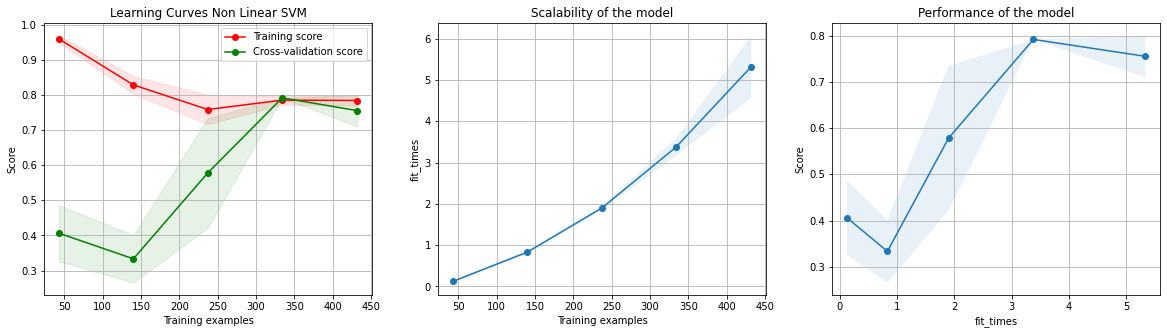

In [ ]:
title = r"Learning Curves Non Linear SVM"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=4, test_size=0.1, random_state=0)
estimator = hm_non_linear_svm.rd_model
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()

In [ ]:
hm_non_linear_svm.rd_model.score(X_test,y_test)

0.8333333333333334

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(hm_non_linear_svm.rd_model,X_train,y_train,cv=4)

array([0.75925926, 0.73148148, 0.77777778, 0.75925926])

In [ ]:
cross_val_score(hm_non_linear_svm.rd_model,X_train,y_train,cv=10)

array([0.81818182, 0.70454545, 0.76744186, 0.6744186 , 0.79069767,
       0.6744186 , 0.74418605, 0.69767442, 0.79069767, 0.81395349])

In [ ]:
cross_val_score(hm_non_linear_svm.rd_model,X,y,cv=4)

array([0.44166667, 0.50833333, 0.6       , 0.5       ])

### Approach 2 : Cross Validated folds = 8 = number of runs

In [15]:
hm_non_linear_svm = hyper_model('non_linear_svm',X_train,y_train,X_test,y_test)

In [16]:
hm_non_linear_svm.fit()

Initial Model with Stock Params Score : 0.6416666666666666
Fitting 8 folds for each of 75 candidates, totalling 600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed: 47.4min finished


Random HP Search Best Model Score : 0.6416666666666666
Improvement of 0.0% relative to the initial model
Fitting 8 folds for each of 100 candidates, totalling 800 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: ignored

In [ ]:
hm_non_linear_svm.rd_model.get_params()

{'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.0001,
 'kernel': 'sigmoid',
 'max_iter': -1,
 'nu': 0.5,
 'probability': False,
 'random_state': True,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
hm_non_linear_svm.all_models_perf

Model Iteration     Score
0                       Stock Params  0.479167
1        Random HP Search Best Model  0.833333
2  Further Grid HP Search Best Model  0.458333

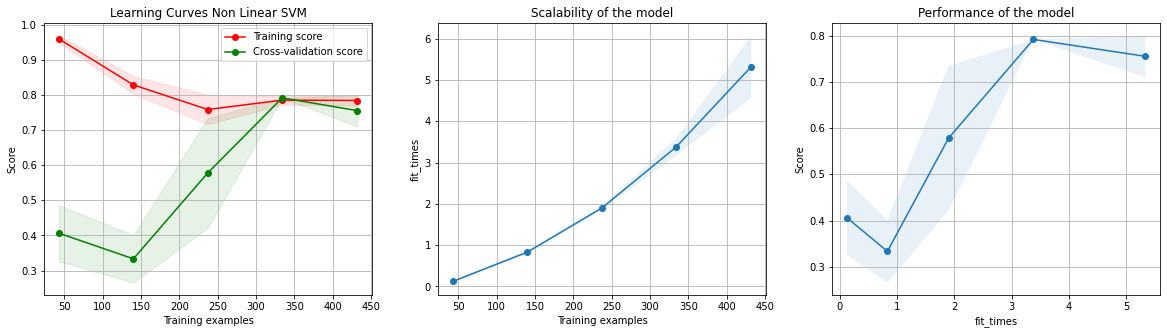

In [ ]:
title = r"Learning Curves Non Linear SVM"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=4, test_size=0.1, random_state=0)
estimator = hm_non_linear_svm.rd_model
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()

In [ ]:
hm_non_linear_svm.rd_model.score(X_test,y_test)

0.8333333333333334

In [ ]:
cross_val_score(hm_non_linear_svm.rd_model,X_train,y_train,cv=4)

array([0.75925926, 0.73148148, 0.77777778, 0.75925926])

In [ ]:
cross_val_score(hm_non_linear_svm.rd_model,X_train,y_train,cv=10)

array([0.81818182, 0.70454545, 0.76744186, 0.6744186 , 0.79069767,
       0.6744186 , 0.74418605, 0.69767442, 0.79069767, 0.81395349])

In [ ]:
cross_val_score(hm_non_linear_svm.rd_model,X,y,cv=4)

array([0.44166667, 0.50833333, 0.6       , 0.5       ])

### Approach 3 : *leave-one-run-out* cross validation

In [ ]:
hm_non_linear_svm.fit()

Initial Model with Stock Params Score : 0.4791666666666667
Fitting 4 folds for each of 75 candidates, totalling 300 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed: 12.8min finished


Random HP Search Best Model Score : 0.8333333333333334
Improvement of 73.91304347826087% relative to the initial model
Fitting 4 folds for each of 100 candidates, totalling 400 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  5.3min finished


Further Grid HP Search Best Model Score : 0.4583333333333333
Improvement of -4.3478260869565295% relative to the initial model
Overall Best Model : 1    Random HP Search Best Model
Name: Model Iteration, dtype: object


In [ ]:
hm_non_linear_svm.rd_model.get_params()

{'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.0001,
 'kernel': 'sigmoid',
 'max_iter': -1,
 'nu': 0.5,
 'probability': False,
 'random_state': True,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
hm_non_linear_svm.all_models_perf

Model Iteration     Score
0                       Stock Params  0.479167
1        Random HP Search Best Model  0.833333
2  Further Grid HP Search Best Model  0.458333

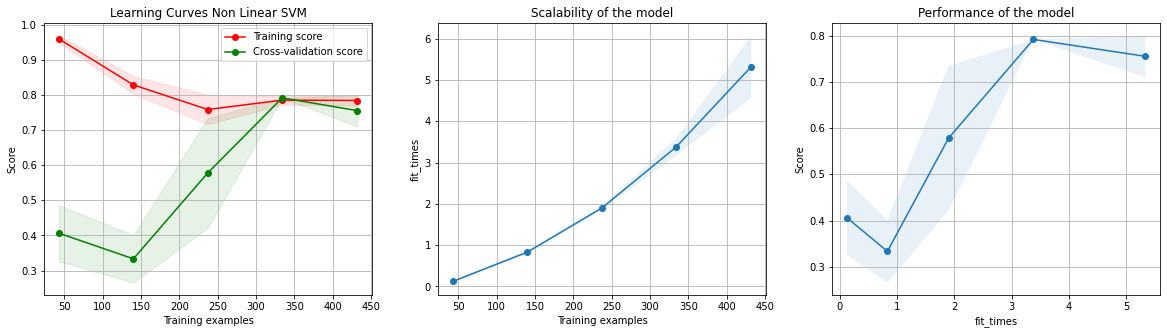

In [ ]:
title = r"Learning Curves Non Linear SVM"
# SVC is more expensive so we do a lower number of CV iterations:
cv = ShuffleSplit(n_splits=4, test_size=0.1, random_state=0)
estimator = hm_non_linear_svm.rd_model
plot_learning_curve(estimator, title, X, y, cv=cv, n_jobs=4)

plt.show()

In [ ]:
hm_non_linear_svm.rd_model.score(X_test,y_test)

0.8333333333333334

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
cross_val_score(hm_non_linear_svm.rd_model,X_train,y_train,cv=4)

array([0.75925926, 0.73148148, 0.77777778, 0.75925926])

In [ ]:
cross_val_score(hm_non_linear_svm.rd_model,X_train,y_train,cv=10)

array([0.81818182, 0.70454545, 0.76744186, 0.6744186 , 0.79069767,
       0.6744186 , 0.74418605, 0.69767442, 0.79069767, 0.81395349])

In [ ]:
cross_val_score(hm_non_linear_svm.rd_model,X,y,cv=4)

array([0.44166667, 0.50833333, 0.6       , 0.5       ])

## Random Forest Classifier

In [ ]:
hm_rf = hyper_model('random_forest_classifier',X_train,y_train,X_test,y_test)

In [ ]:
hm_rf.fit()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    2.3s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Initial Model with Stock Params Score : 0.4166666666666667
Fitting 4 folds for each of 30 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:   27.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:   26.9s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1800 out of 1800 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[

Random HP Search Best Model Score : 0.375
Improvement of -10.000000000000004% relative to the initial model
Overall Best Model : 0    Stock Params
Name: Model Iteration, dtype: object


In [ ]:
hm_rf.best_model

In [ ]:
hm_rf.best_params

In [ ]:
hm_rf.all_models_perf

Model Iteration     Score
0                 Stock Params  0.416667
1  Random HP Search Best Model  0.375000

## XG Boost Random Forest Classsifier

In [ ]:
hm_xg_boost = hyper_model('xg_boost',X_train,y_train,X_test,y_test)

In [ ]:
hm_xg_boost.fit()

Initial Model with Stock Params Score : 0.22916666666666666
Fitting 4 folds for each of 5 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:  7.1min finished


Random HP Search Best Model Score : 0.25
Improvement of 9.090909090909095% relative to the initial model
Overall Best Model : 1    Random HP Search Best Model
Name: Model Iteration, dtype: object


In [ ]:
hm_xg_boost.best_model

In [ ]:
hm_xg_boost.best_params

In [ ]:
hm_xg_boost.all_models_perf